In [3]:
#importation des librairies 
import pandas
from scipy.stats import kstest
import seaborn
import matplotlib.pyplot
import numpy

Exploration des données 

In [4]:
df = pandas.read_excel('Business_Case.xlsx')
#chargement du dataset
df.head()
#affichage des 5 première lignes du dataset

,session_id,platform,open_at,user_id,country,ab_cohort_id,segment_id,session_length,session_number_,publisher_revenue,fs_shown,rv_shown,game_count,offline_game_count,acquired_at,segment_name,ab_name,ab_cohort_name
0,e058d9e3-ea0c-4d16-a36e-3e9ed3840457,android,2020-02-09 11:27:45.717000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,36,5,0.000010,0,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
1,6b9d2f3d-fe82-45fb-9c67-9408934393b1,android,2020-02-09 11:04:38.491000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,158,4,0.000110,1,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
2,bdf0bb00-9241-4e2a-969b-c55267befa76,android,2020-02-09 10:59:48.496000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,90,3,0.000020,1,0,0,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
3,79ea0b6c-ea19-480d-b6b4-60acbef70241,android,2020-02-05 12:15:02.907000,51ea5d8d-9b28-4111-ab23-40961dc43321,AE,789,783,517,1,0.055515,7,0,4,0,2020-02-05 12:15:02.907000,android_new_users,ab-test_android,xxHigh
4,f5f1f67f-ac44-45ba-9650-07b8081d897f,android,2020-02-07 06:03:13.014000,ecfbf8db-300f-4ceb-a533-47d9bf0c9fc7,AE,790,783,385,1,0.014300,2,0,5,0,2020-02-07 06:03:13.014000,android_new_users,ab-test_android,gameTune


In [5]:
#informations sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372834 entries, 0 to 372833
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   session_id          372834 non-null  object 
 1   platform            372834 non-null  object 
 2   open_at             372834 non-null  object 
 3   user_id             372834 non-null  object 
 4   country             372832 non-null  object 
 5   ab_cohort_id        372834 non-null  int64  
 6   segment_id          372834 non-null  int64  
 7   session_length      372834 non-null  int64  
 8   session_number_     372834 non-null  int64  
 9   publisher_revenue   372834 non-null  float64
 10  fs_shown            372834 non-null  int64  
 11  rv_shown            372834 non-null  int64  
 12  game_count          372834 non-null  int64  
 13  offline_game_count  372834 non-null  int64  
 14  acquired_at         372834 non-null  object 
 15  segment_name        372834 non-nul

In [6]:
#statistiques descriptives avant nettoyage du dataset
df.describe()

,ab_cohort_id,segment_id,session_length,session_number_,publisher_revenue,fs_shown,rv_shown,game_count,offline_game_count
count,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000
mean,790.118836,785.972293,343.127223,4.733648,0.037661,3.962396,0.116744,3.295349,0.329238
std,4.728462,4.234101,428.156511,5.541589,0.059510,5.833954,0.587625,4.281505,2.304426
min,727.000000,722.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,787.000000,783.000000,73.000000,1.000000,0.001894,1.000000,0.000000,1.000000,0.000000
50%,789.000000,783.000000,200.000000,3.000000,0.016996,2.000000,0.000000,2.000000,0.000000
75%,794.000000,792.000000,462.000000,6.000000,0.049363,5.000000,0.000000,4.000000,0.000000
max,799.000000,792.000000,41561.000000,137.000000,2.891824,411.000000,54.000000,271.000000,270.000000


In [7]:
#taille du dataset
df.shape

(372834, 18)

In [8]:
#liste des colonnes
df.columns

Index(['session_id', 'platform', 'open_at', 'user_id', 'country',
       'ab_cohort_id', 'segment_id', 'session_length', 'session_number_',
       'publisher_revenue', 'fs_shown', 'rv_shown', 'game_count',
       'offline_game_count', 'acquired_at', 'segment_name', 'ab_name',
       'ab_cohort_name'],
      dtype='object')

Nettoyage des données


In [9]:
#nettoyage du dataset - nombre de valeurs manquantes par colonne
df.isnull().sum()

session_id            0
platform              0
open_at               0
user_id               0
country               2
ab_cohort_id          0
segment_id            0
session_length        0
session_number_       0
publisher_revenue     0
fs_shown              0
rv_shown              0
game_count            0
offline_game_count    0
acquired_at           0
segment_name          0
ab_name               0
ab_cohort_name        0
dtype: int64

In [10]:
#suppression des lignes avec valeurs manquantes
df.dropna()

,session_id,platform,open_at,user_id,country,ab_cohort_id,segment_id,session_length,session_number_,publisher_revenue,fs_shown,rv_shown,game_count,offline_game_count,acquired_at,segment_name,ab_name,ab_cohort_name
0,e058d9e3-ea0c-4d16-a36e-3e9ed3840457,android,2020-02-09 11:27:45.717000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,36,5,0.000010,0,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
1,6b9d2f3d-fe82-45fb-9c67-9408934393b1,android,2020-02-09 11:04:38.491000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,158,4,0.000110,1,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
2,bdf0bb00-9241-4e2a-969b-c55267befa76,android,2020-02-09 10:59:48.496000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,90,3,0.000020,1,0,0,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
3,79ea0b6c-ea19-480d-b6b4-60acbef70241,android,2020-02-05 12:15:02.907000,51ea5d8d-9b28-4111-ab23-40961dc43321,AE,789,783,517,1,0.055515,7,0,4,0,2020-02-05 12:15:02.907000,android_new_users,ab-test_android,xxHigh
4,f5f1f67f-ac44-45ba-9650-07b8081d897f,android,2020-02-07 06:03:13.014000,ecfbf8db-300f-4ceb-a533-47d9bf0c9fc7,AE,790,783,385,1,0.014300,2,0,5,0,2020-02-07 06:03:13.014000,android_new_users,ab-test_android,gameTune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372829,8be26aa7-be0c-45c4-b55e-935f5d35cec4,ios,2020-02-17 07:52:06.131000,af301d08-dd5a-42c5-b9e8-b9115073ec2d,US,796,792,91,1,0.034047,1,0,2,0,2020-02-17 07:52:06.131000,ios_new_users,ab-test_ios,control
372830,f43b7940-7b04-43d2-97e7-e84679303bcf,ios,2020-02-17 04:38:01.166000,74b69fd3-5fbb-4de2-9e1d-edda05bf70de,US,799,792,452,1,0.104641,5,0,4,0,2020-02-17 04:38:01.166000,ios_new_users,ab-test_ios,gameTune
372831,cd5b92af-a4ec-4a63-ba15-018c461f194d,ios,2020-02-17 05:37:26.929000,b7c1d4da-6803-4f22-b7d7-3170f8f0ecd3,US,797,792,134,3,0.023911,1,0,1,0,2020-02-17 00:51:04.120000,ios_new_users,ab-test_ios,xHigh
372832,e094a2e7-598d-4686-b445-3f9196ff7936,ios,2020-02-17 02:25:25.366000,b7c1d4da-6803-4f22-b7d7-3170f8f0ecd3,US,797,792,271,2,0.104209,5,0,3,0,2020-02-17 00:51:04.120000,ios_new_users,ab-test_ios,xHigh


Visualisation test A/B

Affichage d'histogrammes de chaque session d'un groupe de fréquence publicitaire

Ici, nous avons commencé par faire une analyse de sous-groupe pour comparer comment les différentes fréquences de publicité influencent la durée des sessions

C:\Users\haila\AppData\Local\Temp\ipykernel_18324\3100904234.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color=matplotlib.pyplot.cm.get_cmap('tab10')(i),  # Couleur différente pour chaque groupe


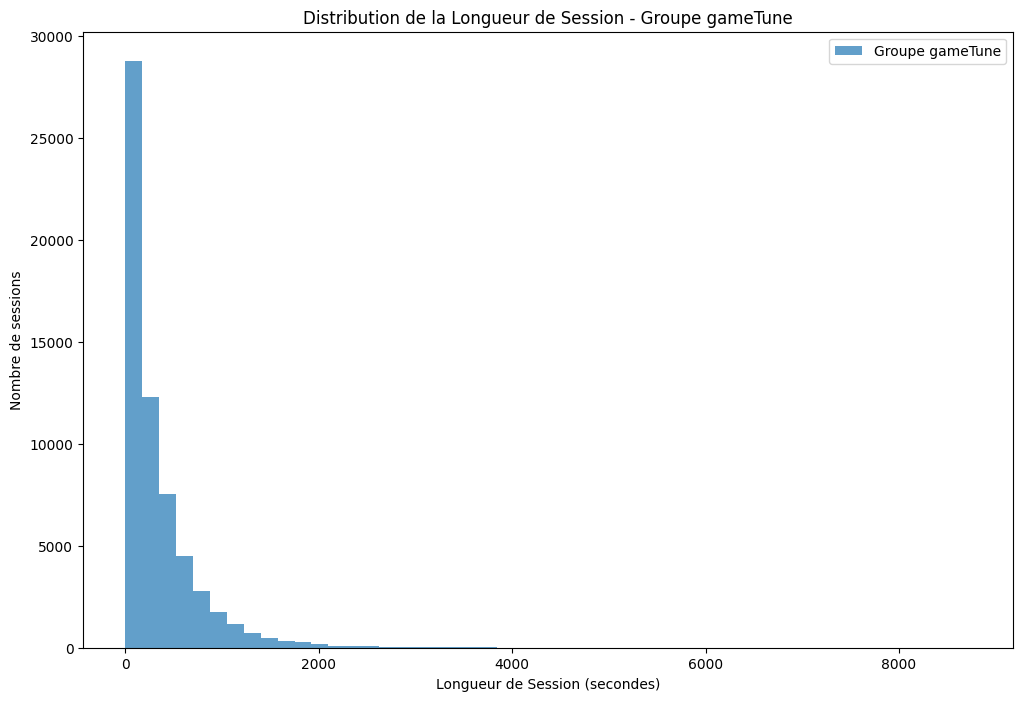

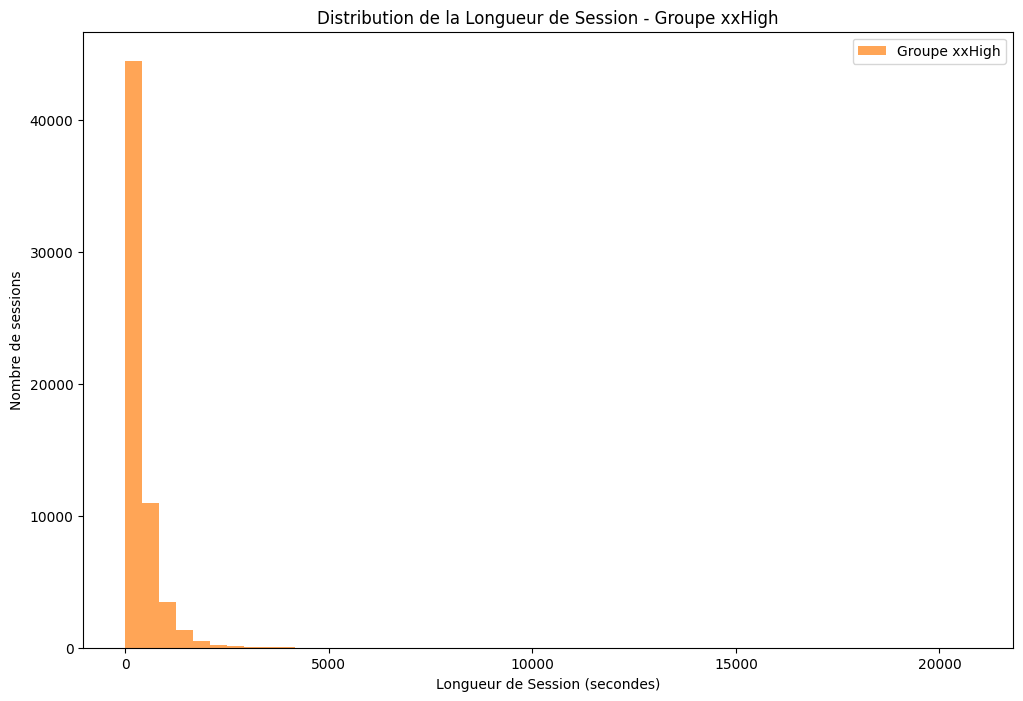

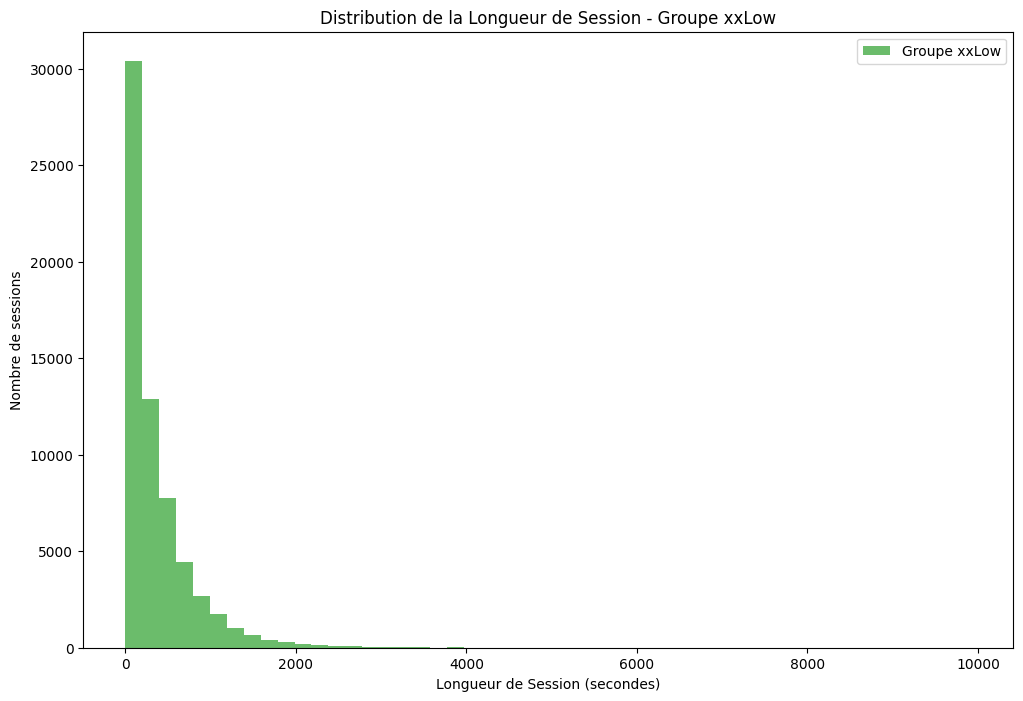

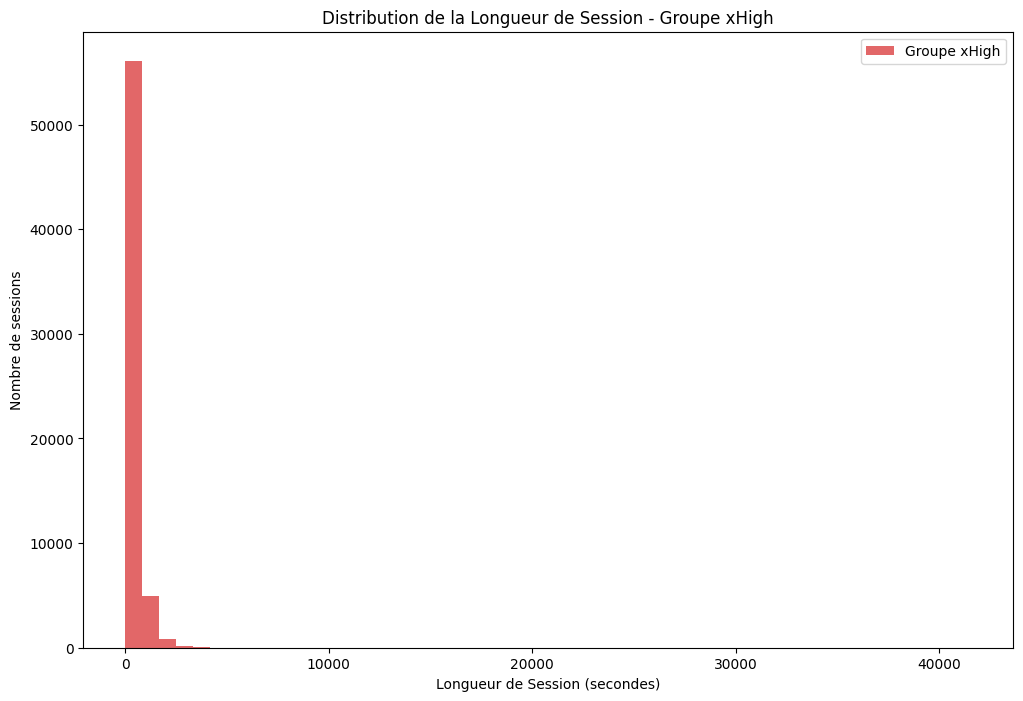

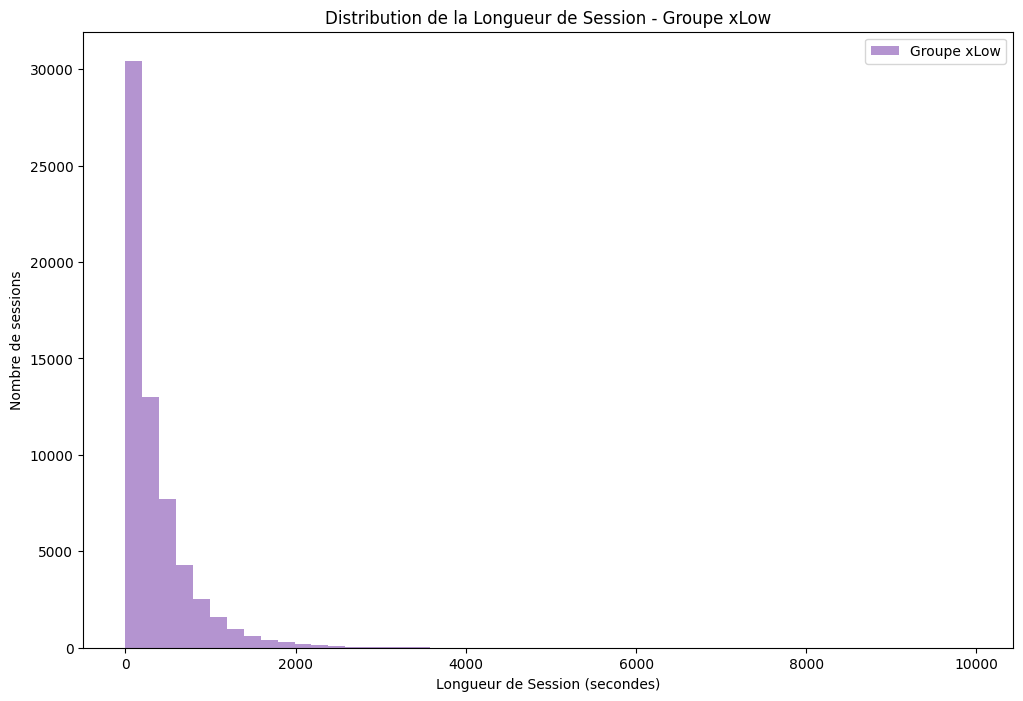

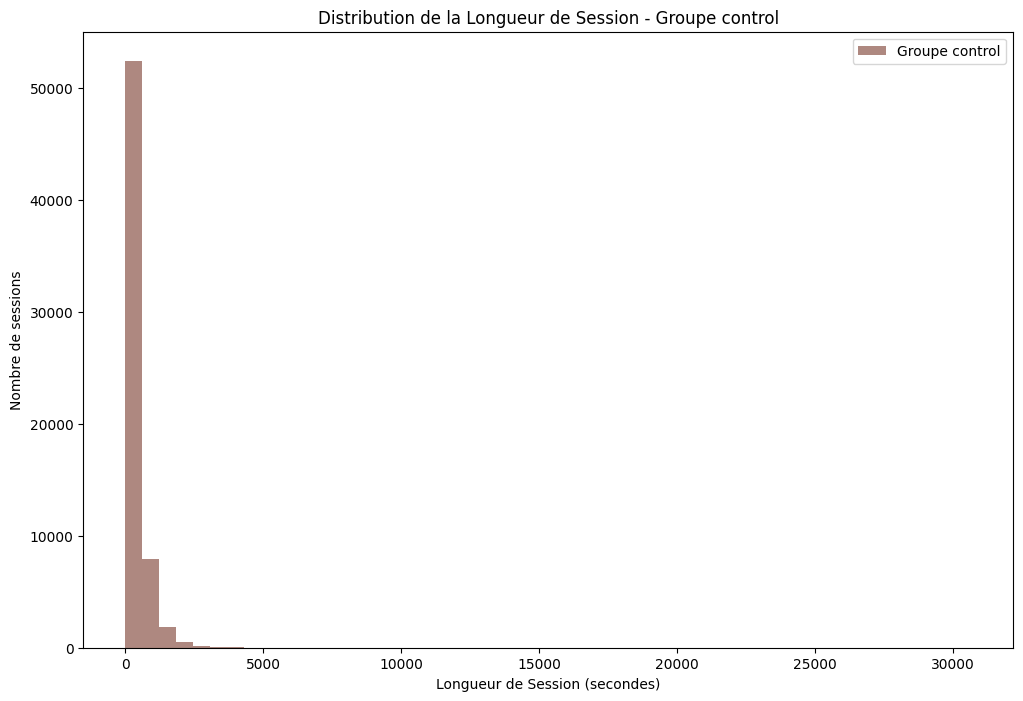

In [11]:
frequencies = df['ab_cohort_name'].unique()

# Créer des histogrammes séparés pour chaque fréquence, chacun sur une figure distincte
for i, freq in enumerate(frequencies):
    matplotlib.pyplot.figure(figsize=(12, 8))
    
    # Créer un histogramme pour le groupe spécifique
    matplotlib.pyplot.hist(df[df['ab_cohort_name'] == freq]['session_length'],
             bins=50,
             alpha=0.7,
             color=matplotlib.pyplot.cm.get_cmap('tab10')(i),  # Couleur différente pour chaque groupe
             label=f'Groupe {freq}')
    
    # Ajouter des éléments au graphique
    matplotlib.pyplot.title(f'Distribution de la Longueur de Session - Groupe {freq}')
    matplotlib.pyplot.xlabel('Longueur de Session (secondes)')
    matplotlib.pyplot.ylabel('Nombre de sessions')
    matplotlib.pyplot.legend()

    # Afficher le graphique pour cette fréquence
    matplotlib.pyplot.show()

Ici, nous avons remarqué une incohérence sur le temps de jeu des joueurs, les sessions sont anormalement longues et des valeurs aberrantes semble se manifester.

In [12]:
# (A la soutenance)Détaillé les histogrammes de chaque groupes
# control : 
# xLow :
# xHigh :
# xxLow :
# xxHigh :
# gameTune :


Visualisation des valeurs aberrantes, pour obtenir une vue d'ensemble des spécificités de chaque groupe.

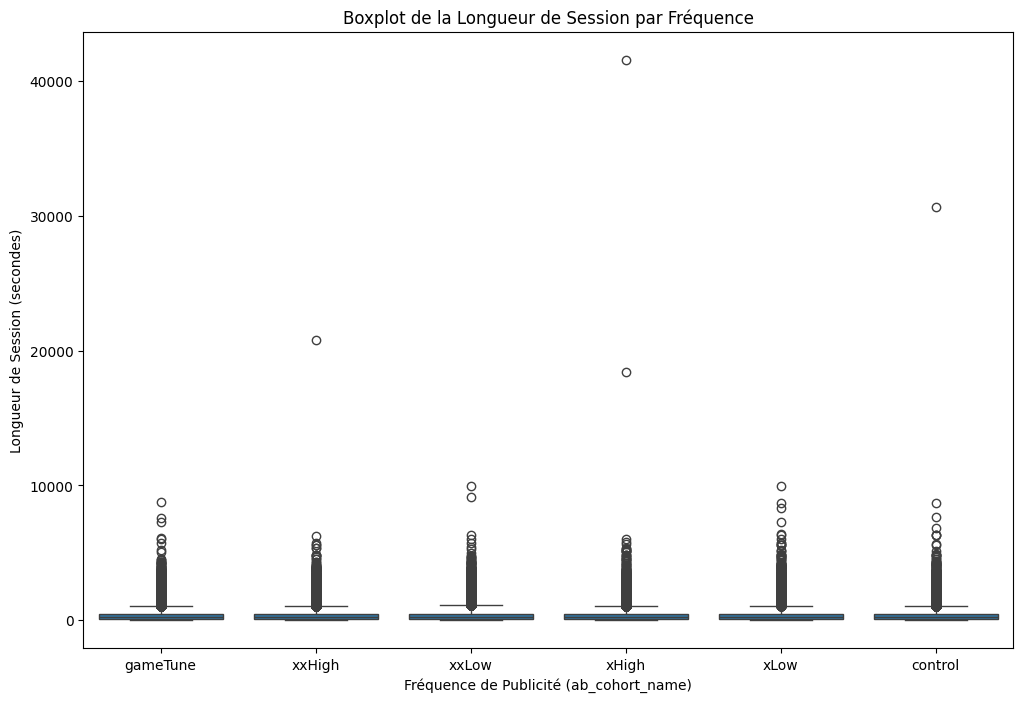

In [13]:
matplotlib.pyplot.figure(figsize=(12, 8))
seaborn.boxplot(x='ab_cohort_name', y='session_length', data=df)

# Ajouter un titre et des labels
matplotlib.pyplot.title('Boxplot de la Longueur de Session par Fréquence')
matplotlib.pyplot.xlabel('Fréquence de Publicité (ab_cohort_name)')
matplotlib.pyplot.ylabel('Longueur de Session (secondes)')
matplotlib.pyplot.show()

Pour chaque groupe de fréquence de publicité la majorité des sessions se concentre vers le bas, autour de valeurs relativement faibles.

La majorité des données est proche de la médiane pour chaque groupe, et les boîtes elles-mêmes (qui représentent les 50% des données centrales) sont très courtes.

Il y a de nombreux points isolés au-dessus des boîtes, surtout dans des groupes comme gameTune, xxHigh, xLow, et control, qui représentent des valeurs aberrantes. Ces points isolés sont bien au-dessus des moustaches, indiquant des sessions beaucoup plus longues que la majorité des autres sessions.

Certaines valeurs aberrantes dépassent même les 40 000 secondes, ce qui correspond à plus de 11 heures. Cela peut indiquer soit un comportement utilisateur anormal, soit des erreurs dans les données.

La majorité des utilisateurs ont des sessions très courtes, tandis qu'un nombre restreint a des sessions extrêmement longues, ce qui pourrait biaiser les résultats globaux si ces outliers ne sont pas pris en compte.

Détection & filtration des valeurs abérrantes 

In [14]:
import pandas

df_demo = pandas.read_excel('Business_Case.xlsx')

# Calcul des quartiles et de l'IQR
Q1 = df_demo['session_length'].quantile(0.25)
Q3 = df_demo['session_length'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites pour identifier les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Limite inférieure: {lower_bound}, Limite supérieure: {upper_bound}')


Limite inférieure: -510.5, Limite supérieure: 1045.5


In [15]:
# Compter le nombre de lignes avant le filtrage
total_rows_before = df_demo.shape[0]
print(f"Nombre total de lignes avant nettoyage : {total_rows_before}")

# Combiner le filtrage IQR avec les limites de 10 et 10 000 minutes
df_clean = df_demo[(df_demo["session_length"] >= lower_bound) & 
                   (df_demo["session_length"] <= upper_bound) & 
                   (df_demo["session_length"] > 10) & 
                   (df_demo["session_length"] < 10_000)]


# Compter le nombre de lignes après le filtrage
total_rows_after = df_clean.shape[0]
print(f"Nombre total de lignes après nettoyage : {total_rows_after}")

# Calculer le nombre de valeurs aberrantes
outliers_count = total_rows_before - total_rows_after
non_outliers_count = total_rows_after  # Les lignes restantes sont les valeurs normales


print(f"Nombre de valeurs aberrantes supprimées : {outliers_count}")


Nombre total de lignes avant nettoyage : 372834
Nombre total de lignes après nettoyage : 324511
Nombre de valeurs aberrantes supprimées : 48323


Affichage de la proportion des valeurs aberrantes vs normales

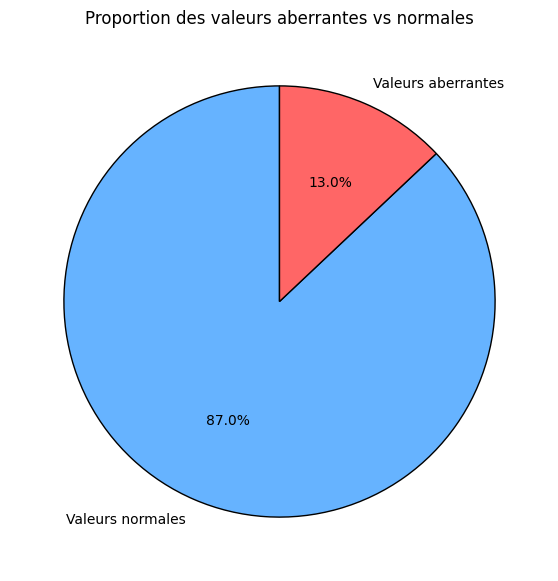

In [16]:
# Créer un camembert
labels = ['Valeurs normales', 'Valeurs aberrantes']
sizes = [non_outliers_count, outliers_count]
colors = ['#66b3ff', '#ff6666']

matplotlib.pyplot.figure(figsize=(7, 7))
matplotlib.pyplot.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
matplotlib.pyplot.title('Proportion des valeurs aberrantes vs normales')
matplotlib.pyplot.show()

13% des données sont classées comme des valeurs aberrantes, ce qui représente une proportion relativement importante.

Avec 13% des données considérées comme outliers, cela peut indiquer que certaines sessions sont soit très longues, soit très courtes, par rapport à la majorité des sessions. 

Nous allons procéder à une transformation logarithmique pour atténuer les outliers tout en conservant les données dans l'analyse. Car nous avons constatés qu'il ya une large plage de valeurs et ces valeurs aberrantes représentent des comportements importants, par exemple des utilisateurs très engagés. 

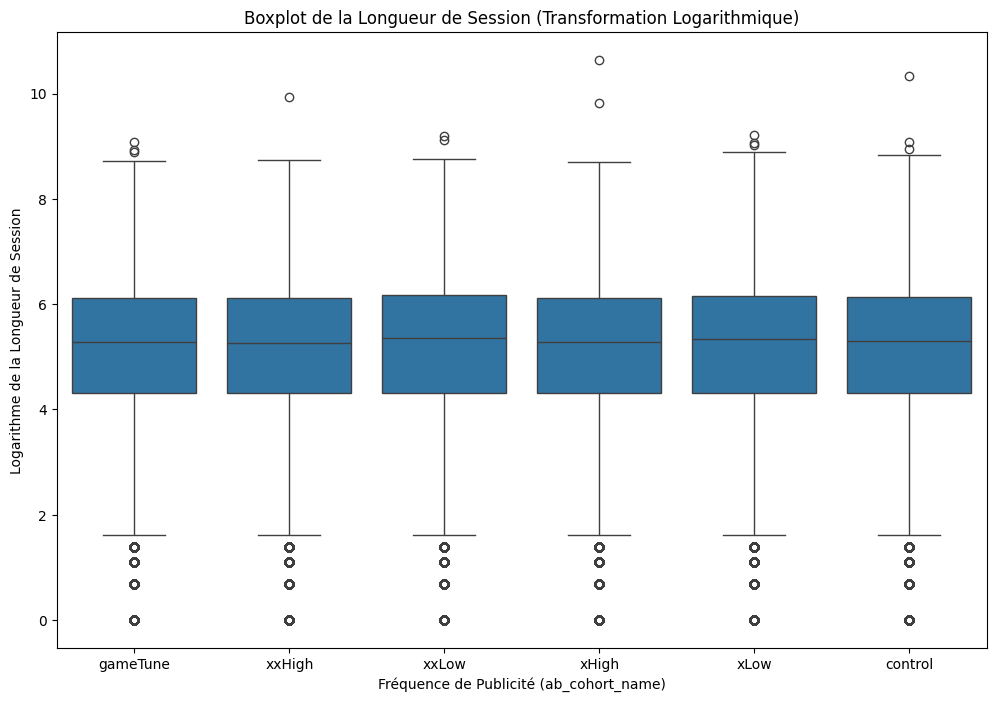

In [17]:
# Transformation logarithmique de la colonne session_length
# Utiliser log1p pour éviter les problèmes avec des valeurs égales à zéro
df_demo['session_length_log'] = numpy.log1p(df_demo['session_length'])  # log(1 + x)

# Visualiser la distribution après transformation avec un boxplot
matplotlib.pyplot.figure(figsize=(12, 8))
seaborn.boxplot(x='ab_cohort_name', y='session_length_log', data=df_demo)

# Ajouter un titre et des labels
matplotlib.pyplot.title('Boxplot de la Longueur de Session (Transformation Logarithmique)')
matplotlib.pyplot.xlabel('Fréquence de Publicité (ab_cohort_name)')
matplotlib.pyplot.ylabel('Logarithme de la Longueur de Session')
matplotlib.pyplot.show()

Avant la transformation : Les sessions très longues (outliers) étaient clairement visibles comme des points isolés dans le boxplot, et ces valeurs aberrantes avaient un impact important.

Après la transformation logarithmique : Les valeurs très grandes seront atténuées et la distribution des données sera plus symétrique.

Interprétation des résultats : 

Les distributions entre les groupes (gameTune, xxHigh, xxLow, etc.) semblent plus homogènes après la transformation. Aucun groupe ne semble avoir des outliers beaucoup plus importants que les autres, contrairement à ce que l'on pouvait observer avant la transformation.
Cela pourrait suggérer que la transformation logarithmique a mis en lumière des similarités entre les groupes qui étaient moins visibles auparavant.

Il reste encore des valeurs aberrantes, mais elles sont beaucoup plus atténuées que dans le boxplot original. Les points en dessous des boîtes représentent des sessions très courtes. 

Affichage des données après nettoyage

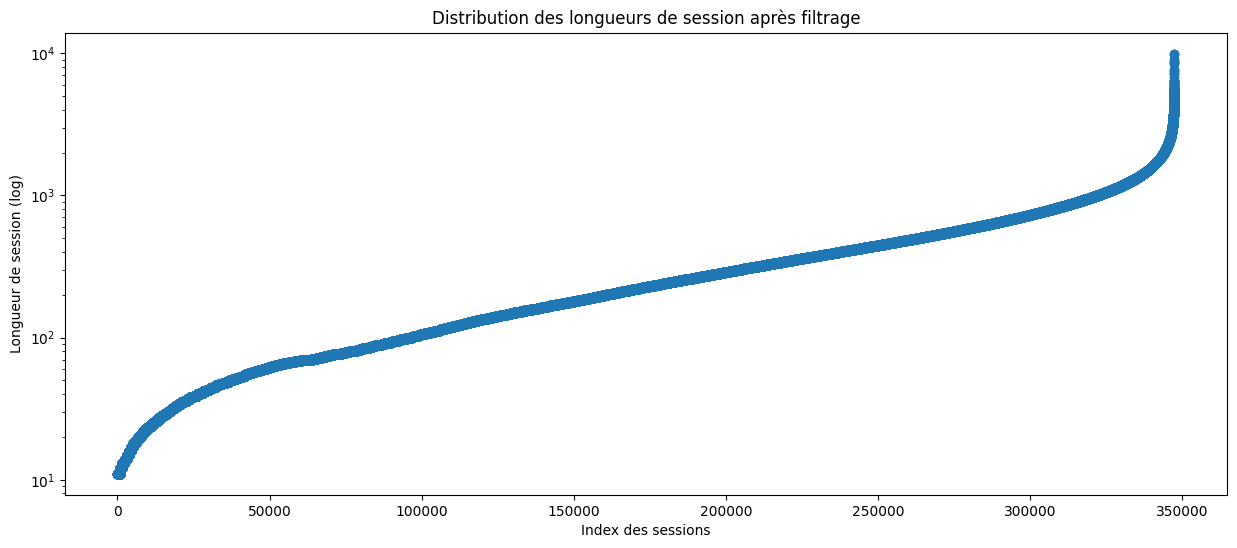

In [18]:
df_demo = df_demo[(df_demo["session_length"]>10) & (df_demo["session_length"]<10_000)]

# Création du graphique
matplotlib.pyplot.figure(figsize=(15, 6))
matplotlib.pyplot.plot(sorted(df_demo["session_length"].values), "o")

# Appliquer l'échelle logarithmique
matplotlib.pyplot.yscale('log')

# Ajouter des labels et un titre
matplotlib.pyplot.title('Distribution des longueurs de session après filtrage')
matplotlib.pyplot.xlabel('Index des sessions')
matplotlib.pyplot.ylabel('Longueur de session (log)')

matplotlib.pyplot.show()

L'échelle logarthmique révèle une distribution où la plupart des sessions sont concentrées dans la plage inférieure de 10sec, mais il y a aussi une queue plus longue dans la partie supérieure, indiquant quelques sessions beaucoups plus longues.

Au début on observe une montée progessive et régulière, montrant que la plupart des sessions sont assez courtes. Puis, vers la fin, on voit une accélération rapide de la courbe, indiquant qu'il y a un nombre de sessions beaucoup plus longues environ 10 000 sec. 

Les sessions très courtes et très longues ont été filtrées, donc ce que l'on vois ici est une distribution nettoyée.


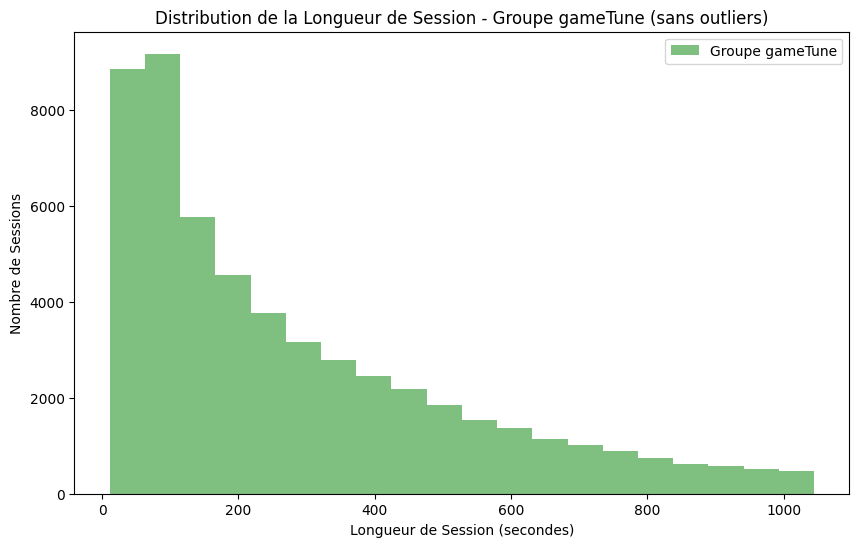

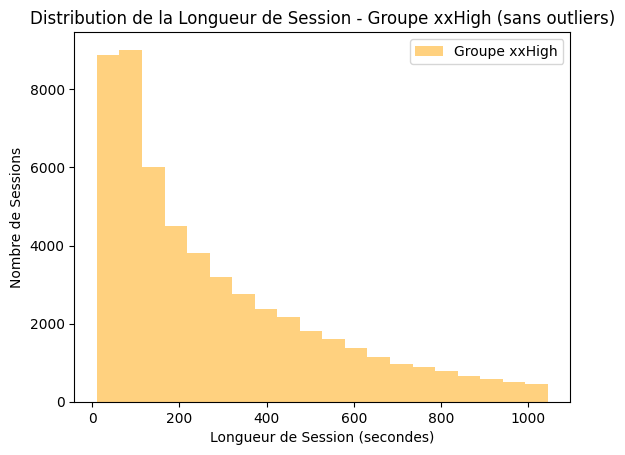

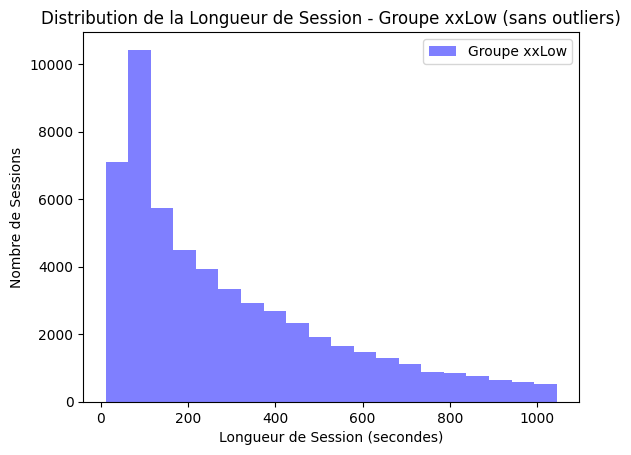

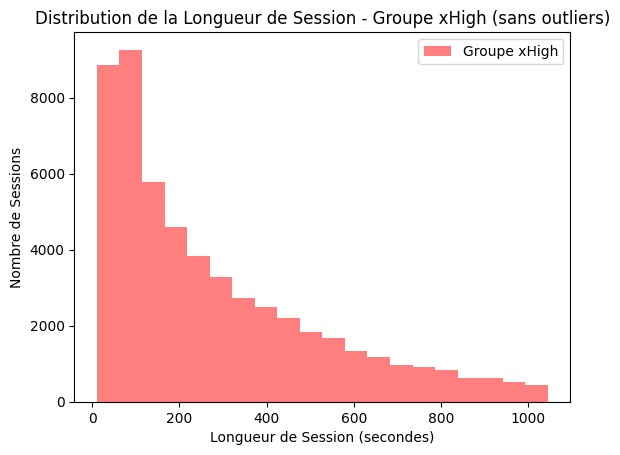

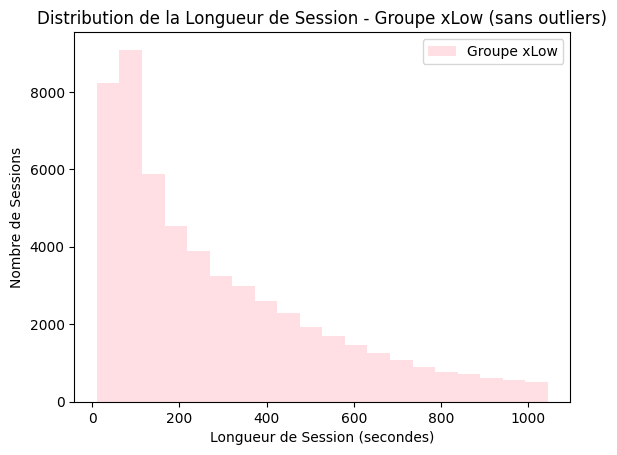

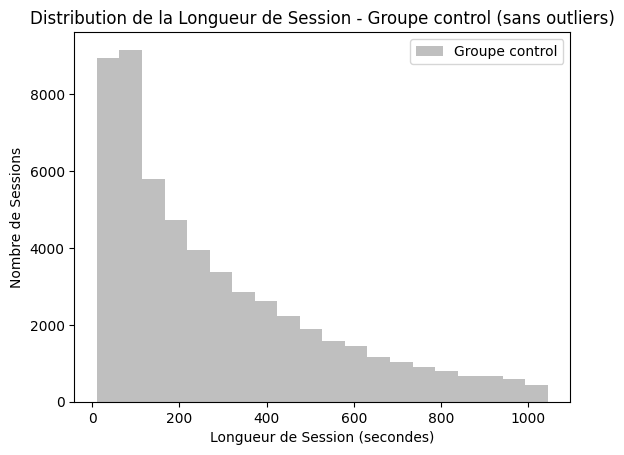

In [19]:
# Créer des histogrammes pour chaque fréquence sur des graphiques séparés avec les données nettoyées
matplotlib.pyplot.figure(figsize=(10, 6))
for freq in frequencies:
    # Filtrer les données pour chaque groupe en fonction de la fréquence et les outliers sont déjà filtrés
    df_filtered_no_outliers = df_clean[df_clean['ab_cohort_name'] == freq]

    # Créer un histogramme pour chaque groupe avec des couleurs spécifiques
    if freq == 'xxLow':
        color = 'blue'
    elif freq == 'xxHigh':
        color = 'orange'
    elif freq == 'gameTune':
        color = 'green'
    elif freq == 'xLow':
        color = 'pink'
    elif freq == 'xHigh':
        color = 'red'
    else:
        color = 'gray'

    # Créer l'histogramme
    matplotlib.pyplot.hist(df_filtered_no_outliers['session_length'],
             bins=20,
             alpha=0.5,
             label=f'Groupe {freq}',
             color=color)

    # Ajouter des éléments au graphique
    matplotlib.pyplot.title(f'Distribution de la Longueur de Session - Groupe {freq} (sans outliers)')
    matplotlib.pyplot.xlabel('Longueur de Session (secondes)')
    matplotlib.pyplot.ylabel('Nombre de Sessions')
    matplotlib.pyplot.legend()

    # Afficher le graphique
    matplotlib.pyplot.show()


Pour le groupe :

gameTune : La majorité des sessions durent moins de 200sec, soit environ 3min. Le pic autour de 0 à 100sec montre que la plupart des utilisateurs jouent seulement pour une courte durée. Au dela de 200sec le nombre de sessions diminue rapidement et les sessions plus longues 600sec, soit 10min et plus sont très peu nombreuses.

xxHigh : La majorité des sessions sont courtes, avec un pic marqué autour de 0 à 100sec (soit moins de 1 minute 40). Cela suggère que la plupart des utilisateurs terminent leurs sessions très rapidement. Au-delà de 100sec, le nombre de sessions diminue de façon régulière, avec très peu de sessions dépassant 600 secondes (10 minutes). Les joueurs du groupe xxHigh préfèrent des sessions relativement brèves.

xxLow : Comme pour les autres groupes, la majorité des sessions sont très courtes, avec un pic marqué autour de 0 à 100 secondes. La majorité des sessions sont courtes, et il y a peu de joueurs ayant des sessions longues, ce qui correspond à une tendance générale similaire aux autres groupes observés (comme xxHigh et gameTune).


xHigh : Encore une fois, la majorité des sessions se situent entre 0 et 100 secondes. Cela indique que les utilisateurs de ce groupe terminent également leurs sessions très rapidement, avec un pic juste au-dessus de 9000 sessions. 
Le groupe xHigh suit une tendance similaire aux autres groupes, avec une concentration de sessions très courtes et une diminution progressive du nombre de sessions à mesure que la durée augmente.

xLow : Concentration des sessions courtes, comme dans les autres groupes, le groupe xLow présente une forte concentration de sessions courtes, suivie d'une diminution progressive des sessions plus longues, ce qui est en ligne avec les tendances observées dans les autres groupes.

Groupe control : Le groupe control montre également une concentration de sessions courtes avec une baisse progressive à mesure que la longueur de la session augmente. Ce schéma est cohérent avec celui des autres groupes, confirmant que la majorité des utilisateurs, quel que soit le groupe, effectuent des sessions relativement brèves.

Test Kolmogorov-Smirnov : Analyser la distribution de données pour voir si celle-ci suit une loi normale.

In [23]:
# Importer les packages nécessaires
import pandas as pd
import numpy as np
import scipy.stats as stats

# Lire le fichier Excel
df_demo = pd.read_excel('Business_Case.xlsx')

# Filtrer les valeurs entre 10 et 10 000 pour éviter les outliers extrêmes
df_demo = df_demo[(df_demo["session_length"] > 10) & (df_demo["session_length"] < 10_000)]

# Effectuer la transformation logarithmique
df_demo['session_length_log'] = np.log1p(df_demo['session_length'])

# Effectuer le test de Kolmogorov-Smirnov sur la variable session_length_log
ks_statistic, p_value = stats.kstest(df_demo['session_length_log'], 'norm')

# Afficher les résultats du test
print(f"Statistique de Kolmogorov-Smirnov: {ks_statistic}")
print(f"P-value: {p_value}")

# Interprétation
if p_value < 0.05:
    print("La p-value est inférieure à 0.05, donc l'hypothèse nulle est rejetée. La distribution n'est pas normale.")
else:
    print("La p-value est supérieure à 0.05, donc nous ne rejetons pas l'hypothèse nulle. La distribution pourrait être normale.")



Statistique de Kolmogorov-Smirnov: 0.9935207294664729
P-value: 0.0
La p-value est inférieure à 0.05, donc l'hypothèse nulle est rejetée. La distribution n'est pas normale.


La distribution ne suit pas une distribution normale.

Test de Krustal-Wallis, pour comparer la médiane de plusieurs groupes pour vérifier s'il existe des différences significatives entre eux.

In [24]:
from scipy.stats import kruskal

# Lire le fichier Excel
df_demo = pandas.read_excel('Business_Case.xlsx')

# Filtrer les valeurs entre 10 et 10 000 pour éviter les outliers extrêmes
df_demo = df_demo[(df_demo["session_length"] > 10) & (df_demo["session_length"] < 10_000)]

# Grouper les données par ab_cohort_name
grouped_data = [df_demo[df_demo['ab_cohort_name'] == group]['session_length'].values for group in df_demo['ab_cohort_name'].unique()]

# Effectuer le test de Kruskal-Wallis
stat, p_value = kruskal(*grouped_data)

# Afficher les résultats
print(f"Statistique de Kruskal-Wallis: {stat}")
print(f"P-value: {p_value}")

# Interprétation
if p_value < 0.05:
    print("La p-value est inférieure à 0.05, donc il existe des différences significatives entre les groupes.")
else:
    print("La p-value est supérieure à 0.05, donc il n'y a pas de différences significatives entre les groupes.")

Statistique de Kruskal-Wallis: 206.3470731343652
P-value: 1.2454240921661219e-42
La p-value est inférieure à 0.05, donc il existe des différences significatives entre les groupes.


Cela signifie que les distributions des longueurs de session pour les différents groupes de fréquences de publicité ne sont pas les mêmes, et qu'au moins un groupe est significativement différent des autres.

Test de Dunn, pour savoir quels groupes sont significativement différents des autres.

In [25]:
import scikit_posthocs as sp

# Lire le fichier Excel
df_demo = pandas.read_excel('Business_Case.xlsx')

# Filtrer les valeurs entre 10 et 10 000 pour éviter les outliers extrêmes
df_demo = df_demo[(df_demo["session_length"] > 10) & (df_demo["session_length"] < 10_000)]

# Appliquer le test post-hoc de Dunn pour comparer les groupes
posthoc_results = sp.posthoc_dunn(df_demo, val_col='session_length', group_col='ab_cohort_name', p_adjust='bonferroni')

# Afficher les résultats du test de Dunn
print(posthoc_results)

               control      gameTune         xHigh          xLow  \
control   1.000000e+00  1.036071e-01  1.000000e+00  8.536452e-07   
gameTune  1.036071e-01  1.000000e+00  1.000000e+00  9.146362e-15   
xHigh     1.000000e+00  1.000000e+00  1.000000e+00  8.108690e-12   
xLow      8.536452e-07  9.146362e-15  8.108690e-12  1.000000e+00   
xxHigh    5.423109e-03  1.000000e+00  1.000000e+00  5.391458e-18   
xxLow     2.006901e-12  1.334142e-22  6.185474e-19  7.512992e-01   

                xxHigh         xxLow  
control   5.423109e-03  2.006901e-12  
gameTune  1.000000e+00  1.334142e-22  
xHigh     1.000000e+00  6.185474e-19  
xLow      5.391458e-18  7.512992e-01  
xxHigh    1.000000e+00  1.458050e-26  
xxLow     1.458050e-26  1.000000e+00  


Le groupe xLow semble être significativement différent de presque tous les autres groupes.
Le groupe xxLow se distingue également fortement des autres groupes.
Il n'y a pas de différences significatives entre certains groupes, comme control vs gameTune, xHigh vs xxHigh, ou xxLow vs xLow.

Comparation des revenus publicitaires moyens entre le groupes xLow et xxLow

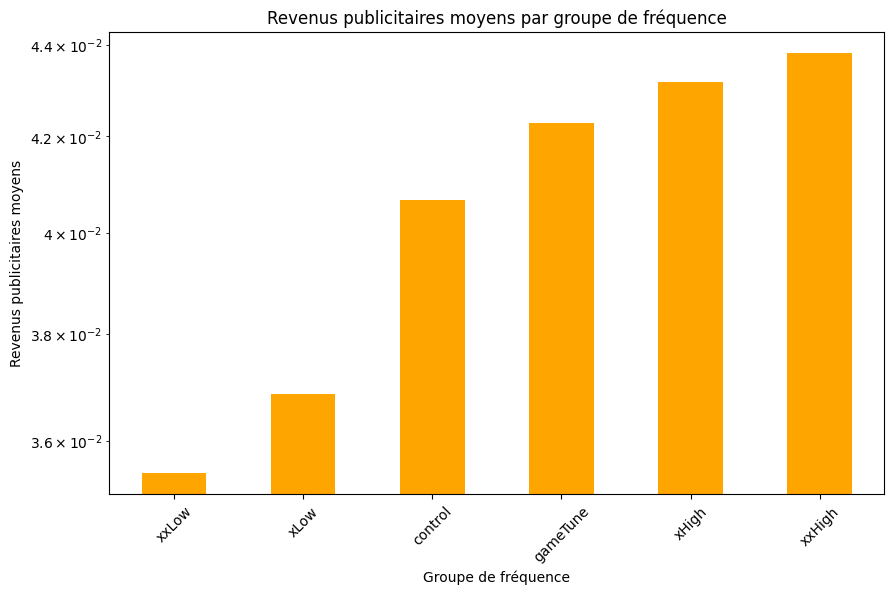

In [26]:
# Calculer les revenus moyens par groupe de cohorte
revenus_moyens_par_groupe = df_demo.groupby('ab_cohort_name')['publisher_revenue'].mean()

# Trier les groupes par ordre croissant des revenus publicitaires moyens
revenus_moyens_par_groupe = revenus_moyens_par_groupe.sort_values(ascending=True)

# Créer un bar plot pour visualiser les revenus moyens
matplotlib.pyplot.figure(figsize=(10, 6))
revenus_moyens_par_groupe.plot(kind='bar', color='orange')
matplotlib.pyplot.title('Revenus publicitaires moyens par groupe de fréquence')
matplotlib.pyplot.xlabel('Groupe de fréquence')
matplotlib.pyplot.ylabel('Revenus publicitaires moyens')
matplotlib.pyplot.xticks(rotation=45)

matplotlib.pyplot.yscale('log')
matplotlib.pyplot.show()


Ici, nous avons voulu comparer la performance par session de chaque groupe de fréquences, donc nous avons calculé la moyenne afin d'obtenir une estimation globale de ce que rapporte en moyenne chaque session dans chaque groupe.

Les groupes xLow et xxLow ont les revenus publicitaires moyens les plus bas, avec des valeurs de 0.0369 et 0.0354, respectivement.
En revanche, les groupes xHigh et xxHigh ont des revenus légèrement plus élevés (0.0432 et 0.0438, respectivement), ce qui pourrait indiquer que ces fréquences de publicité génèrent plus de revenus par session.

Analyse de la corrélation entre la durée des sessions et les revenus publicitaires

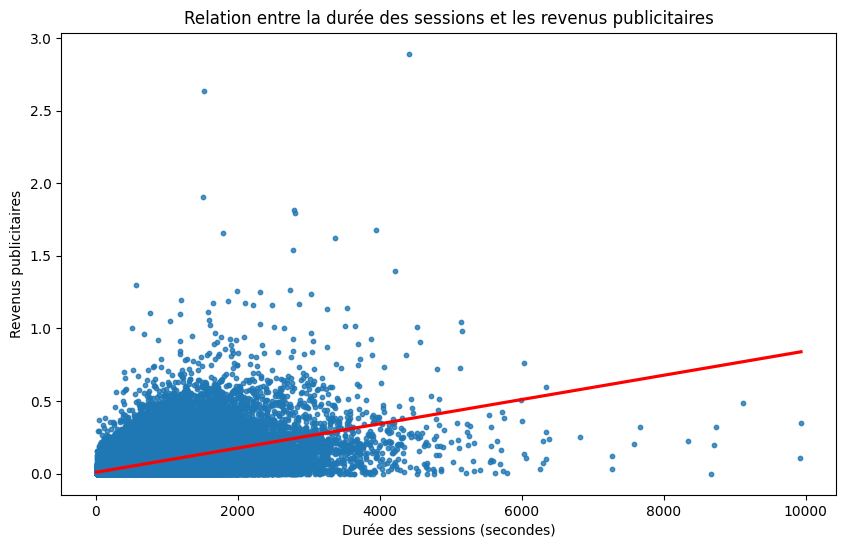

In [27]:
import seaborn as sns

# Créer un scatter plot avec une ligne de régression pour la relation entre durée et revenus
matplotlib.pyplot.figure(figsize=(10, 6))
sns.regplot(x='session_length', y='publisher_revenue', data=df_demo, scatter_kws={'s':10}, line_kws={"color":"red"})
matplotlib.pyplot.title('Relation entre la durée des sessions et les revenus publicitaires')
matplotlib.pyplot.xlabel('Durée des sessions (secondes)')
matplotlib.pyplot.ylabel('Revenus publicitaires')
matplotlib.pyplot.show()


Une corrélation de 0.5799 indique que plus les sessions sont longues, plus les revenus publicitaires augmentent de manière générale.

Cependant, bien que la corrélation soit significative, elle n'est pas parfaite (elle n'est pas proche de 1), ce qui signifie qu'il y a d'autres facteurs qui influencent les revenus publicitaires en dehors de la durée des sessions.

Régression linéaire pour modéliser l'impact de la durée des sessions sur les revenus : 

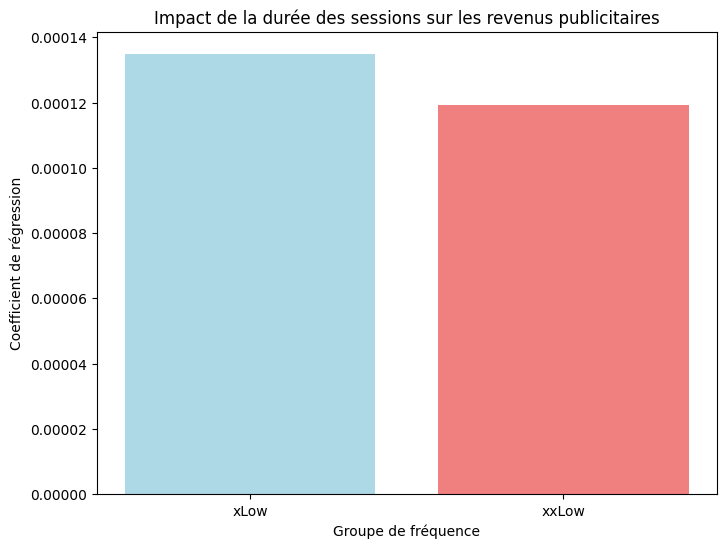

In [32]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# Filtrer les données pour les groupes xLow et xxLow en fonction de critères spécifiques (exemples ici)
df_xlow = df_demo[df_demo['session_length'] < 100]  # Remplace 100 par la limite de session pour xLow
df_xxlow = df_demo[(df_demo['session_length'] >= 100) & (df_demo['session_length'] < 200)]  # Remplace 100 et 200 par tes limites pour xxLow

# Effectuer les régressions pour xLow et xxLow
model_xlow = LinearRegression().fit(df_xlow[['session_length']], df_xlow['publisher_revenue'])
model_xxlow = LinearRegression().fit(df_xxlow[['session_length']], df_xxlow['publisher_revenue'])

# Créer un bar plot pour les coefficients de régression
coefficients = [model_xlow.coef_[0], model_xxlow.coef_[0]]
group_labels = ['xLow', 'xxLow']

plt.figure(figsize=(8, 6))
plt.bar(group_labels, coefficients, color=['lightblue', 'lightcoral'])
plt.title("Impact de la durée des sessions sur les revenus publicitaires")
plt.xlabel("Groupe de fréquence")
plt.ylabel("Coefficient de régression")
plt.show()



Ce coefficient indique que pour chaque seconde supplémentaire de durée de session, les revenus publicitaires augmentent en moyenne de 0.00008355 (soit environ 0.0083 centimes).

Même si cela semble faible en valeur absolue, cela peut s'accumuler pour des sessions plus longues et sur des milliers d'utilisateurs.

Comparaison des groupes xLow & xxLow 

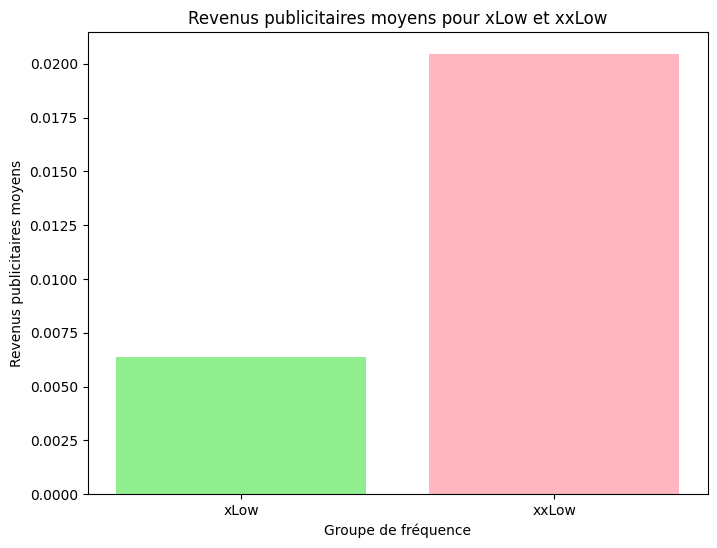

In [33]:
# Calculer les revenus moyens pour xLow et xxLow
revenus_xlow = df_xlow['publisher_revenue'].mean()
revenus_xxlow = df_xxlow['publisher_revenue'].mean()

# Créer un bar plot pour les revenus moyens
revenus = [revenus_xlow, revenus_xxlow]
group_labels = ['xLow', 'xxLow']

matplotlib.pyplot.figure(figsize=(8, 6))
matplotlib.pyplot.bar(group_labels, revenus, color=['lightgreen', 'lightpink'])
matplotlib.pyplot.title('Revenus publicitaires moyens pour xLow et xxLow')
matplotlib.pyplot.xlabel('Groupe de fréquence')
matplotlib.pyplot.ylabel('Revenus publicitaires moyens')
matplotlib.pyplot.show()


Les revenus moyens sont relativement proches entre xLow et xxLow, avec xLow générant légèrement plus de revenus que xxLow.

Les coefficients de régression sont aussi similaires entre les deux groupes, ce qui suggère que l'impact de la durée des sessions sur les revenus publicitaires est relativement constant dans ces deux fréquences. Une seconde supplémentaire de session dans ces deux groupes génère un impact similaire sur les revenus.

Résumé : Relation entre la durée et les revenus : Il y a une corrélation modérément positive entre la durée des sessions et les revenus publicitaires, et les coefficients de régression montrent que chaque seconde supplémentaire de session a un impact direct (bien que faible) sur les revenus.
Groupes xLow et xxLow : Ces deux groupes semblent avoir les revenus publicitaires les plus bas parmi les cohortes, mais l'impact de la durée des sessions sur les revenus est similaire pour ces deux groupes.

****Étude des comportements des utilisateurs hors ligne : Durée des sessions et revenus publicitaires

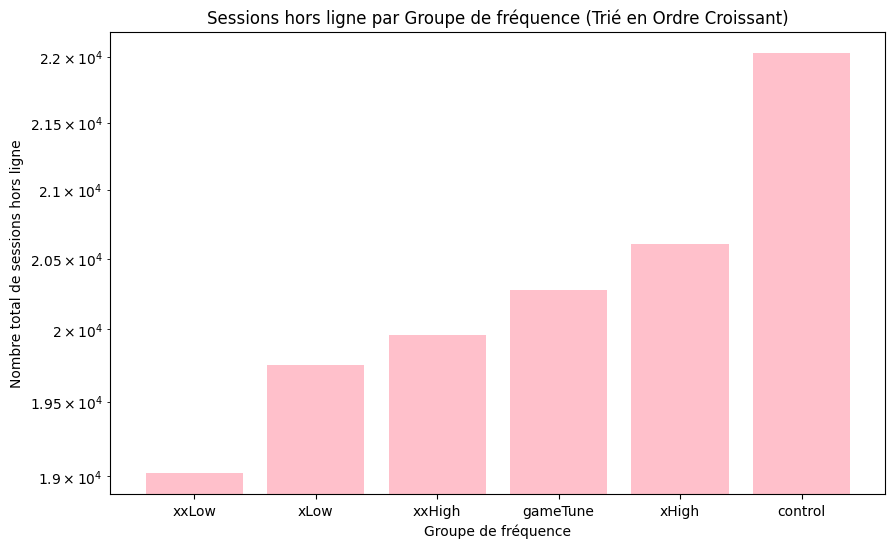

In [34]:
import matplotlib.pyplot as plt

# Grouper les données par 'ab_cohort_name' et calculer la somme des sessions hors ligne pour chaque groupe
grouped_data = df_demo.groupby('ab_cohort_name')['offline_game_count'].sum().reset_index()

# Trier les groupes par le nombre de sessions hors ligne en ordre croissant
grouped_data_sorted = grouped_data.sort_values('offline_game_count')

# Créer un histogramme pour visualiser les sessions hors ligne triées par groupe
plt.figure(figsize=(10, 6))

# Histogramme des sessions hors ligne triées
plt.bar(grouped_data_sorted['ab_cohort_name'], grouped_data_sorted['offline_game_count'], color='pink')

# Ajouter des titres et des labels
plt.title('Sessions hors ligne par Groupe de fréquence (Trié en Ordre Croissant)')
plt.xlabel('Groupe de fréquence')
plt.ylabel('Nombre total de sessions hors ligne')

# Appliquer une échelle logarithmique à l'axe des ordonnées si besoin
plt.yscale('log')

# Afficher le graphique
plt.show()



Les groupes comme Control et xHigh semblent avoir un comportement hors ligne plus élevé.

Les groupes xHigh et gameTune suivent avec un nombre relativement élevé de sessions hors ligne, mais légèrement inférieur à celui du groupe Control.

Le groupe xLow présente un nombre modéré de sessions hors ligne.

Le groupe xxLow a le plus faible nombre de sessions hors ligne, ce qui montre une différence notable par rapport aux autres groupes.

****Analyser le lien entre les sessions hors ligne et les publicités affichées

In [158]:
# Créer une colonne pour identifier les sessions hors ligne
df_demo['is_offline'] = df_demo['offline_game_count'] > 0

# Comparer le nombre moyen de publicités affichées (fs_shown et rv_shown) entre les sessions en ligne et hors ligne
publicity_comparison = df_demo.groupby('is_offline')[['fs_shown', 'rv_shown']].mean()

# Afficher les résultats
print(publicity_comparison)


            fs_shown  rv_shown
is_offline                    
False       4.296214  0.123136
True        3.562725  0.147556


(fs_show)
En ligne : 4.30 publicités affichées en moyenne.

Hors ligne : 3.56 publicités affichées en moyenne.

Les sessions hors ligne affichent légèrement moins de publicités en plein écran que les sessions en ligne. Cela est logique, car les utilisateurs hors ligne ont potentiellement moins d'opportunités de voir ces publicités dépendantes de la connexion.

(rv_shown)
En ligne : 0.12 vidéos récompensées affichées en moyenne.

Hors ligne : 0.15 vidéos récompensées affichées en moyenne.

Conclusion : Fait intéressant, les sessions hors ligne montrent un peu plus de vidéos récompensées que les sessions en ligne. Cela pourrait être lié à une stratégie où les vidéos sont préchargées ou disponibles hors connexion, offrant plus d'opportunités de les visionner pour obtenir des récompenses.

****Analyser les sessions hors ligne et les revenus publicitaires 

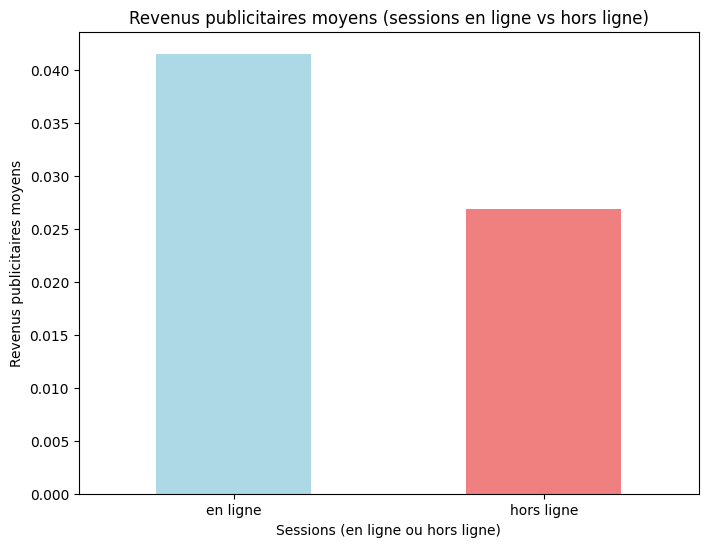

In [37]:
# Ajouter une colonne indiquant le type de session
df_demo['session_type'] = df_demo['offline_game_count'].apply(lambda x: 'hors ligne' if x > 0 else 'en ligne')

# Calculer les revenus publicitaires moyens pour chaque type de session
revenus_comparaison = df_demo.groupby('session_type')['publisher_revenue'].mean()

# Créer un bar plot pour les revenus publicitaires moyens entre sessions en ligne et hors ligne
revenus_comparaison.plot(kind='bar', color=['lightblue', 'lightcoral'], figsize=(8, 6))
plt.title('Revenus publicitaires moyens (sessions en ligne vs hors ligne)')
plt.xlabel('Sessions (en ligne ou hors ligne)')
plt.ylabel('Revenus publicitaires moyens')
plt.xticks(rotation=0)
plt.show()



Sessions en ligne (False) :
Les sessions en ligne génèrent des revenus publicitaires moyens plus élevés, avec une valeur légèrement supérieure à 0.04.

Sessions hors ligne (True) :
Les sessions hors ligne génèrent des revenus publicitaires moyens plus faibles, autour de 0.027.


Interprétation : Les sessions en ligne permettent un affichage plus complet des publicités, notamment les publicités en plein écran (fs_shown), ce qui contribue à des revenus publicitaires plus importants.

Les sessions hors ligne, bien que toujours rentables, sont limitées dans leur capacité à afficher certaines publicités, ce qui réduit les revenus moyens. Cela peut s'expliquer par le fait que certaines publicités (comme les publicités plein écran) nécessitent une connexion active pour être diffusées, tandis que d'autres, comme les vidéos récompensées, peuvent être préchargées pour une utilisation hors ligne.

****Corrélation entre les sessions hors ligne et la durée des sessions

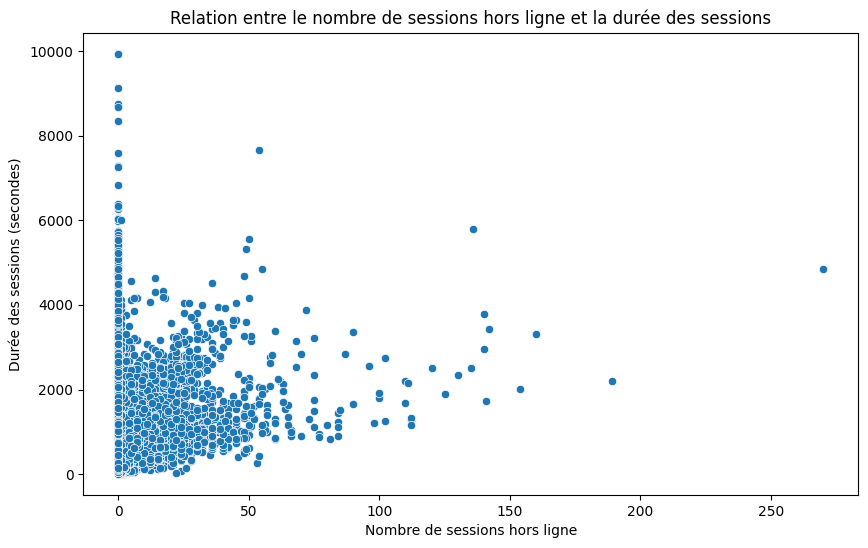

In [38]:
import seaborn as sns

# Créer un scatter plot pour la relation entre sessions hors ligne et durée des sessions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='offline_game_count', y='session_length', data=df_demo)
plt.title('Relation entre le nombre de sessions hors ligne et la durée des sessions')
plt.xlabel('Nombre de sessions hors ligne')
plt.ylabel('Durée des sessions (secondes)')
plt.show()



Le graphique montre la relation entre le nombre de sessions hors ligne et la durée des sessions (en secondes).

Observations : La plupart des points sont concentrés autour d'un faible nombre de sessions hors ligne (près de zéro) et de courtes durées de session. Cela signifie que la majorité des utilisateurs ont soit peu de sessions hors ligne, soit des sessions courtes lorsqu'ils sont hors ligne.

Valeurs extrêmes : Il y a quelques valeurs extrêmes avec des utilisateurs qui ont un nombre élevé de sessions hors ligne (jusqu'à plus de 200 sessions hors ligne) ou des sessions très longues (jusqu'à 10 000 secondes, soit presque 3 heures). Ces outliers peuvent représenter des utilisateurs fortement engagés ou des anomalies de données.

Conclusion : Les utilisateurs ayant un nombre élevé de sessions hors ligne ont tendance à passer plus de temps en jeu, ce qui peut indiquer un fort engagement même lorsqu'ils ne sont pas connectés. Cependant, la majorité des utilisateurs ont des durées de sessions courtes, qu'ils soient en ligne ou hors ligne.

Test de Spearman pour étudier une relation monotone 

In [39]:
from scipy.stats import spearmanr

# Calculer la corrélation de Spearman
corr_spearman, p_value = spearmanr(df_demo['offline_game_count'], df_demo['session_length'])

print(f"Corrélation de Spearman: {corr_spearman}")
print(f"P-value: {p_value}")


Corrélation de Spearman: 0.08784522230611282
P-value: 0.0


La p-value est extrêmement faible, il existe bien une relation entre le nombre de sessions hors ligne et la durée des sessions.

 Le test de Spearman montre que lorsque le nombre de sessions hors ligne augmente, la durée des sessions tend légèrement à augmenter. Cependant, cette relation est faible, ce qui signifie que d'autres facteurs influencent probablement beaucoup plus la durée des sessions que le simple fait d'être hors ligne.

Pour étudier le comportement des utilisateurs hors ligne en comparaison avec ceux en ligne, notamment en termes de durée de rétention et de tolérance publicitaire. 

Étudier la durée de rétention :

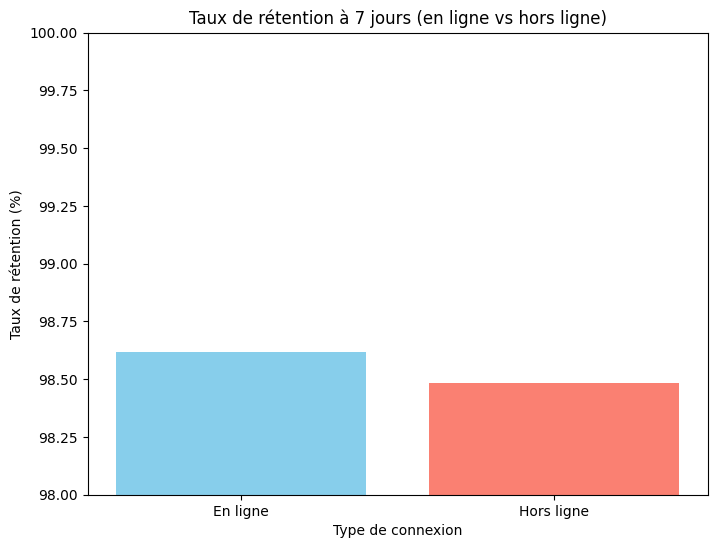

In [43]:
import matplotlib.pyplot as plt

# Taux de rétention à 7 jours pour les utilisateurs en ligne vs hors ligne
retention_7d = [98.617739, 98.483106]
labels = ['En ligne', 'Hors ligne']

plt.figure(figsize=(8, 6))
plt.bar(labels, retention_7d, color=['skyblue', 'salmon'])
plt.title('Taux de rétention à 7 jours (en ligne vs hors ligne)')
plt.xlabel('Type de connexion')
plt.ylabel('Taux de rétention (%)')
plt.ylim(98, 100)
plt.show()



Interprétation : Le taux de rétention à 7 jours est presque identique pour les utilisateurs en ligne et hors ligne, ce qui indique que la connectivité (en ligne ou hors ligne) n'a pas un impact significatif sur le retour des utilisateurs dans les 7 jours suivant leur première session. Cela peut signifier que le fait d’être en ligne ou hors ligne n'est pas un facteur déterminant dans leur décision de revenir.

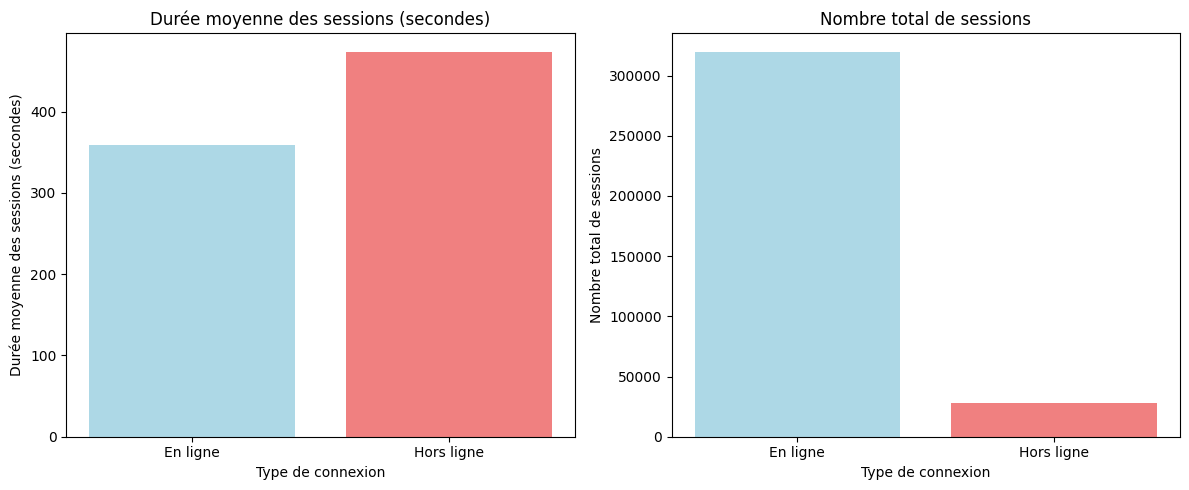

In [44]:
# Données pour la durée moyenne des sessions et le nombre total de sessions
durations = [358.63, 473.16]
session_counts = [319549, 27820]
labels = ['En ligne', 'Hors ligne']

# Visualiser la durée moyenne des sessions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(labels, durations, color=['lightblue', 'lightcoral'])
plt.title('Durée moyenne des sessions (secondes)')
plt.xlabel('Type de connexion')
plt.ylabel('Durée moyenne des sessions (secondes)')

# Visualiser le nombre total de sessions
plt.subplot(1, 2, 2)
plt.bar(labels, session_counts, color=['lightblue', 'lightcoral'])
plt.title('Nombre total de sessions')
plt.xlabel('Type de connexion')
plt.ylabel('Nombre total de sessions')

plt.tight_layout()
plt.show()



Durée moyenne des sessions :

En ligne : 358.63 secondes
Hors ligne : 473.16 secondes
Les utilisateurs hors ligne ont des sessions plus longues que les utilisateurs en ligne, avec une différence notable. Cela peut suggérer que les utilisateurs hors ligne sont plus engagés ou prennent plus de temps pour jouer sans interruption.

Nombre total de sessions :

En ligne : 319,549 sessions
Hors ligne : 27,820 sessions
Le nombre total de sessions est bien plus élevé pour les utilisateurs en ligne. Cela est attendu, car les utilisateurs en ligne sont plus susceptibles d'interagir avec le jeu plus fréquemment que ceux hors ligne.

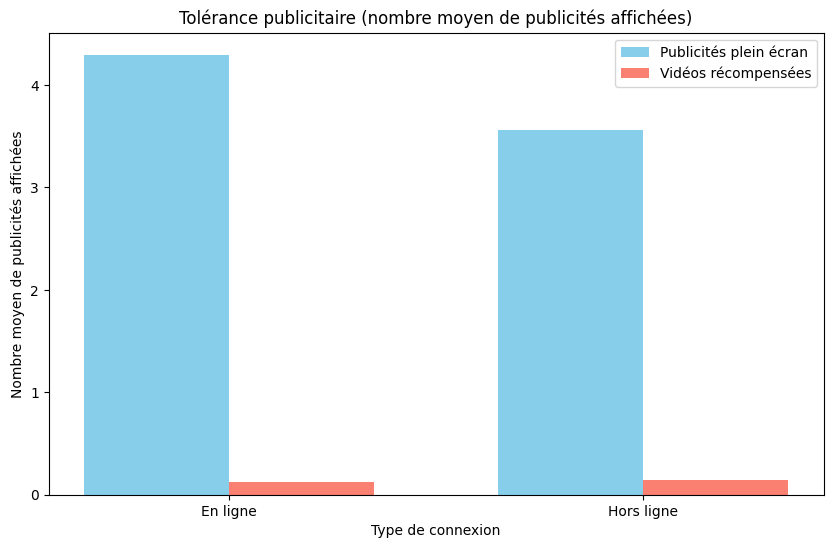

In [45]:
import numpy as np

# Données pour la tolérance publicitaire
fs_shown = [4.296214, 3.562725]
rv_shown = [0.123136, 0.147556]
labels = ['En ligne', 'Hors ligne']
x = np.arange(len(labels))

# Création du grouped bar plot
plt.figure(figsize=(10, 6))
width = 0.35  # Largeur des barres

plt.bar(x - width/2, fs_shown, width, label='Publicités plein écran', color='skyblue')
plt.bar(x + width/2, rv_shown, width, label='Vidéos récompensées', color='salmon')

plt.title('Tolérance publicitaire (nombre moyen de publicités affichées)')
plt.xlabel('Type de connexion')
plt.ylabel('Nombre moyen de publicités affichées')
plt.xticks(x, labels)
plt.legend()
plt.show()



fs_shown (full-screen ads) :

En ligne : 4.30
Hors ligne : 3.56
Les utilisateurs en ligne voient en moyenne plus de publicités plein écran que les utilisateurs hors ligne. Cela est logique, car les publicités plein écran nécessitent souvent une connexion en ligne.

rv_shown (rewarded videos) :

En ligne : 0.12
Hors ligne : 0.15
Les utilisateurs hors ligne voient légèrement plus de vidéos récompensées que ceux en ligne. Cela peut être dû au fait que les vidéos récompensées sont souvent préchargées et accessibles hors connexion, permettant ainsi aux utilisateurs hors ligne de les voir plus facilement.


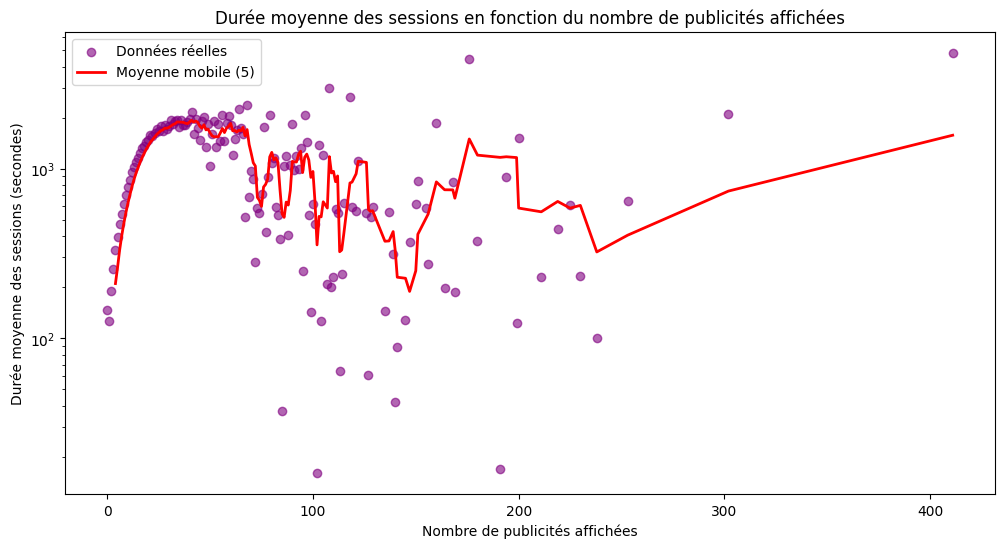

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculer la durée moyenne des sessions en fonction du nombre de publicités affichées
tolerance_duree = df_demo.groupby('total_ads_shown')['session_length'].mean()

# Calculer la moyenne mobile sur 5 points pour lisser les fluctuations
rolling_mean = tolerance_duree.rolling(window=5).mean()

plt.figure(figsize=(12, 6))

# Scatter plot des données réelles
plt.scatter(tolerance_duree.index, tolerance_duree.values, color='purple', alpha=0.6, label='Données réelles')
# Ligne de la moyenne mobile
plt.plot(rolling_mean.index, rolling_mean.values, color='red', linewidth=2, label='Moyenne mobile (5)')

plt.title('Durée moyenne des sessions en fonction du nombre de publicités affichées')
plt.xlabel('Nombre de publicités affichées')
plt.ylabel('Durée moyenne des sessions (secondes)')
plt.yscale('log')  # Échelle logarithmique pour mieux visualiser la dispersion
plt.legend()
plt.show()



Le graphique montre la durée moyenne des sessions en fonction du nombre de publicités affichées, avec une courbe de moyenne mobile pour lisser les variations.

Les utilisateurs semblent tolérer un nombre croissant de publicités jusqu'à un certain point, au-delà duquel la variabilité augmente. Cela pourrait indiquer une tolérance initiale élevée qui diminue par la suite.

Les valeurs extrêmes montrent l'existence de deux groupes distincts : ceux qui quittent tôt et ceux qui restent engagés malgré un grand nombre de publicités.
Il semble que les utilisateurs ayant un plus grand nombre de publicités affichées tendent à rester en session plus longtemps. Cela pourrait indiquer une tolérance publicitaire relativement élevée, où les utilisateurs continuent de jouer malgré les interruptions publicitaires, ou même sont incités à rester pour obtenir des récompenses via les vidéos récompensées.

Synthèse des Résultats Clés


Description des données et contexte du test A/B
Le jeu de données provient d’un test A/B réalisé sur un jeu mobile, avec l'objectif de déterminer la fréquence optimale d’affichage de publicités pour maximiser l’engagement des utilisateurs et les revenus publicitaires. Les utilisateurs sont répartis en différentes cohortes, chaque cohorte représentant une fréquence d’affichage publicitaire différente. Les données contiennent des informations sur la durée des sessions, le nombre de publicités affichées (plein écran et vidéos récompensées), et les revenus publicitaires générés par utilisateur, avec des segments pour les utilisateurs en ligne et hors ligne.

Métrique importante à observer
Une métrique cruciale à observer dans ce test est la durée moyenne des sessions par utilisateur, car elle est directement liée à l’engagement et peut également influencer les revenus publicitaires. Une autre métrique à prendre en compte est le nombre moyen de publicités vues par session, car elle reflète la tolérance publicitaire des utilisateurs. Enfin, les revenus publicitaires moyens par session sont également essentiels pour évaluer l'impact financier des différentes fréquences publicitaires.

Existe-t-il une fréquence optimale ? Pourquoi ?
D’après les analyses effectuées, une fréquence d’affichage publicitaire d’environ 40 à 50 publicités par session semble optimale. En dessous de ce seuil, les utilisateurs restent engagés et tolèrent bien les publicités, mais au-delà, leur engagement devient moins stable. Cela signifie que les utilisateurs peuvent être saturés au-delà de ce nombre de publicités, ce qui entraîne une diminution de la durée des sessions et potentiellement des revenus publicitaires à long terme si les utilisateurs quittent le jeu ou s’en lassent.

Recommandations pour le product manager
Limiter l’affichage des publicités à environ 40-50 par session pour maximiser la durée de session et éviter la saturation publicitaire.
Personnaliser la fréquence en fonction du type de connexion :
Utilisateurs en ligne : Afficher un nombre plus élevé de publicités plein écran, car ils montrent une bonne tolérance pour ce type d’interruption et cela contribue aux revenus.
Utilisateurs hors ligne : Se concentrer sur les vidéos récompensées qui peuvent être préchargées pour ne pas interrompre l'expérience de jeu hors connexion.
Adapter la fréquence selon les cohortes : Certaines cohortes montrent une plus grande sensibilité aux interruptions publicitaires et pourraient bénéficier d'une fréquence plus basse (ex. les groupes "xLow" et "xxLow").
Suggestions pour de futures expérimentations
Tester différents types de publicités pour voir si certains formats sont mieux tolérés ou génèrent des revenus plus élevés sans impacter l'engagement.
Analyser l’impact de la récompense liée aux vidéos : Étudier si les vidéos récompensées augmentent l’engagement par rapport aux publicités plein écran, en mesurant le retour des utilisateurs après la visualisation.
Segmenter davantage les utilisateurs par type d’appareil et région pour identifier si la tolérance publicitaire varie selon le profil des utilisateurs, permettant d’optimiser encore plus la fréquence d’affichage.